# <center> **Визуализация данных**
------

In [1]:
import pandas as pd

c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Dmitriy Chuprinko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## <center> **Знакомимся с новыми данными: коронавирус**

Данные о показателях заболеваемости за каждый день в различных регионах 187 стран:

In [2]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.sample(5))

date province/state        country  confirmed  deaths  recovered
233793  02/24/2021            NaN        Denmark   209079.0  2345.0   200715.0
101291  09/02/2020            NaN       Cameroon    19460.0   415.0    17651.0
117654  09/23/2020     Washington  United States    85397.0  2057.0        0.0
138629  10/22/2020            NaN        Burundi      551.0     1.0      497.0
19311   04/27/2020            NaN          India    29451.0   939.0     7137.0

Данные о процессе вакцинирования людей в 221 стране мира:

In [3]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.sample(5))

country        date  total_vaccinations  \
35021  Sint Maarten (Dutch part)  2021-05-08                 NaN   
26700                      Nauru  2021-06-22                 NaN   
22482                  Lithuania  2021-04-18            779345.0   
34579                 Seychelles  2021-07-05            139625.0   
21711                    Lesotho  2021-03-23                 NaN   

       people_vaccinated  people_vaccinated_per_hundred  \
35021                NaN                            NaN   
26700                NaN                            NaN   
22482           568472.0                          21.13   
34579            71490.0                          72.28   
21711                NaN                            NaN   

       people_fully_vaccinated  people_fully_vaccinated_per_hundred  \
35021                      NaN                                  NaN   
26700                      NaN                                  NaN   
22482                 210873.0                                 7.84   
34579                  68135.0                                68.89   
21711                      NaN                                  NaN   

       daily_vaccinations                                           vaccines  
35021               212.0       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech  
26700                36.0                                 Oxford/AstraZeneca  
22482             14389.0  Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...  
34579               178.0              Oxford/AstraZeneca, Sinopharm/Beijing  
21711               410.0                                 Oxford/AstraZeneca

#### <center> ПРЕДОБРАБОТКА ДАННЫХ

1. Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [4]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

2. Преобразуем даты в формат `datetime` с помощью функции `pd.to_datetime()`:

In [5]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

3. Создадим признак больных на данный момент (`active`).  
Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [6]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

4. Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей.  
Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода `diff()`:

In [7]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data.head()

date      country  confirmed  deaths  recovered  active  \
11337 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
11570 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
11807 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
12051 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
12299 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

       daily_confirmed  daily_deaths  daily_recovered  
11337              NaN           NaN              NaN  
11570              0.0           0.0              0.0  
11807              0.0           0.0              0.0  
12051              0.0           0.0              0.0  
12299              0.0           0.0              0.0

В таблице `vaccinations_data` достаточно будет преобразовать столбцы в формат `datetime`:

In [8]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

Описание данных

In [9]:
display(covid_data['date'].describe(datetime_is_numeric=True))
display(vaccinations_data['date'].describe(datetime_is_numeric=True))

count                            86785
mean     2020-10-15 20:19:34.931151616
min                2020-01-22 00:00:00
25%                2020-06-25 00:00:00
50%                2020-10-17 00:00:00
75%                2021-02-07 00:00:00
max                2021-05-29 00:00:00
Name: date, dtype: object

count                            42795
mean     2021-05-21 12:12:46.182965248
min                2020-12-02 00:00:00
25%                2021-04-02 00:00:00
50%                2021-05-26 00:00:00
75%                2021-07-15 00:00:00
max                2021-09-06 00:00:00
Name: date, dtype: object

С помощью метода `merge()` объединим таблицы `covid_data` и `vaccinations_data` по столбцам `date` и `country`.

In [10]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
covid_df.shape

(86785, 16)

Создадим признаки:  
`death_rate` — общий процент смертей среди зафиксированных случаев  
`recover_rate` — общий процент случаев выздоровления.

Данные характеристики рассчитаем, как отношение числа смертей (`deaths`) и числа выздоровлений (`recovered`) к числу зафиксированных случаев (`confirmed`) и умножим результаты на 100%.

In [11]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

К примеру выведем максимальную летальность в США (`United States`) за весь период и средний процент выздоровевших в России (`Russia`).

In [12]:
mask_USA = covid_df['country'] == 'United States'
round(covid_df[mask_USA]['death_rate'].max(), 3)

mask_Russia = covid_df['country'] == 'Russia'
round(covid_df[mask_Russia]['recover_rate'].mean(), 2)

67.06

## <center> **Графические возможности библиотеки Pandas**

### <center> Базовая визуализация в pandas

Основным методом для создания простейших графиков в Pandas является `plot()`.  
Начнём с исследования заболеваемости коронавирусом во всём мире.  
Для этого первым делом отобразим, как менялось ежедневное число заболевших (`daily_confirmed`) во всём мире во времени.  
Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.  
Визуализируем линейный график с сеткой и названием.

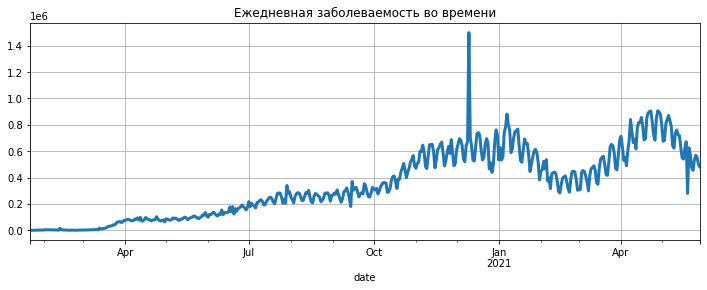

In [13]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=3
);

Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр `kind` выставляем на значение `'hist'`. Параметр `bins` (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10.

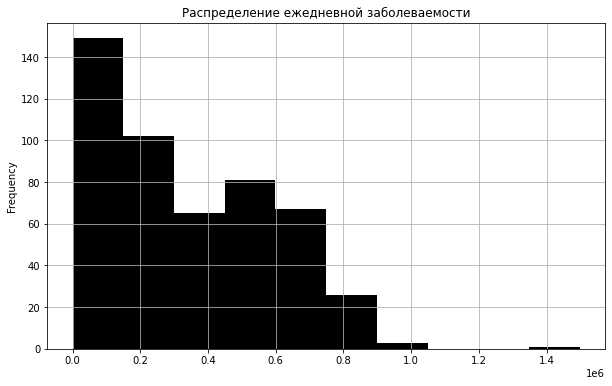

In [14]:
grouped_cases.plot(
    kind='hist',
    figsize=(10,6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='black',
    bins=10
);

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода `last()` — он возвращает последнее значение в столбце `DataFrame`.

Для построения столбчатой диаграммы значение параметра `kind` выставляем на `'bar'`. Параметр `colormap` отвечает за цветовую гамму графика.

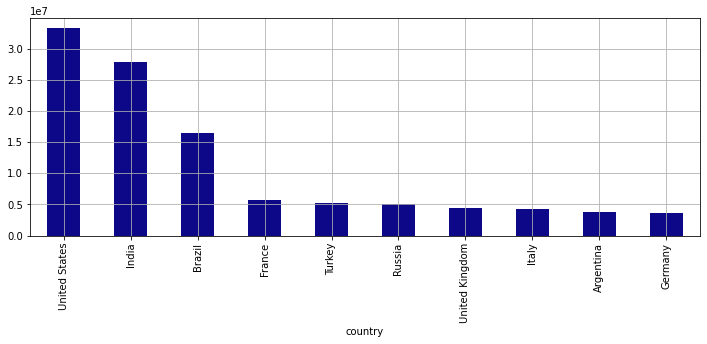

In [15]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

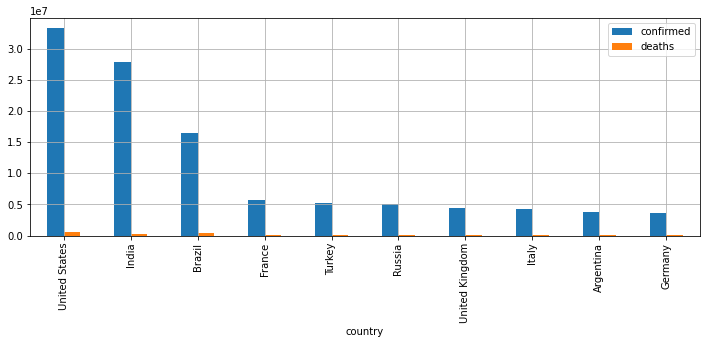

In [16]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    figsize=(12, 4),
    grid=True,
);

Построим ещё одну простую диаграмму в одну строчку. Она будет отображать пять стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (`total_vaccinations`).

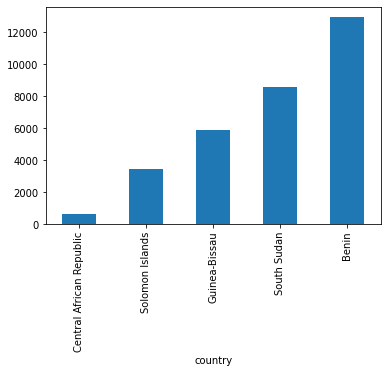

In [17]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

## <center> **Графические возможности библиотеки Matplotlib**

Для установки: `pip install matplotlib`.

In [18]:
import matplotlib.pyplot as plt

# Для более корректного отображения графиков в ноутбуках:
%matplotlib inline

# В случае использования темной темы:
plt.style.use('default')

### <center> Основные объекты Matplotlib

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (`fig`) , содержащий необходимую информацию и настройки, например размер в дюймах (`figsize`, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода `add_axes()` добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

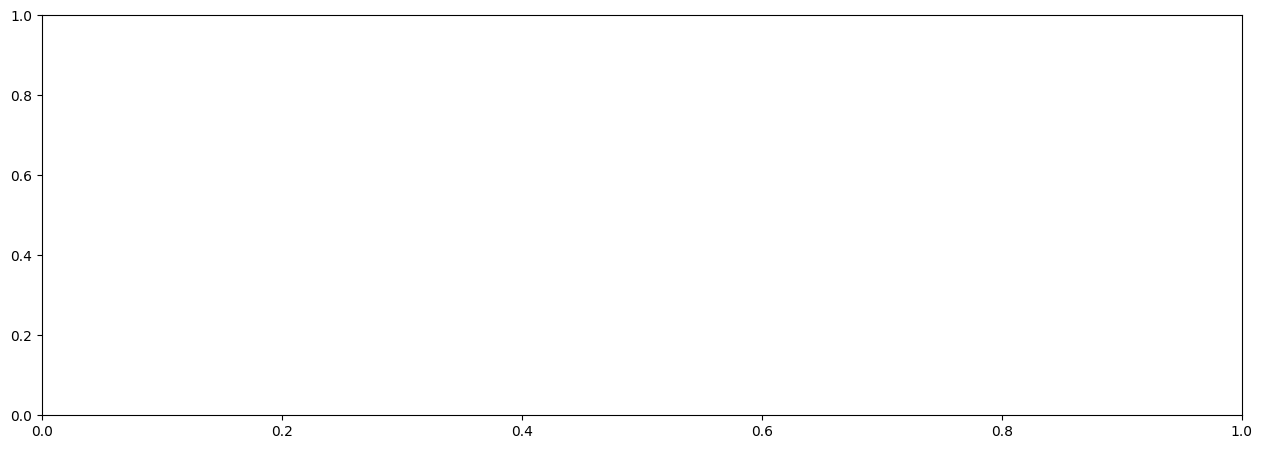

In [19]:
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (`daily_confirmed`) от общего количества привитых вторым компонентом вакцины (`people_fully_vaccinated`) в США.

У объекта координатной плоскости axes вызовем метод `scatter()`.

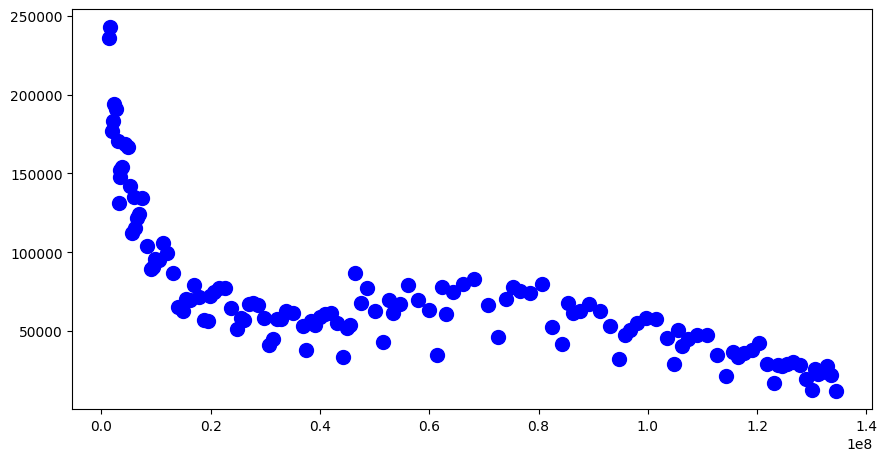

In [20]:
# На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин,
# а по оси ординат — ежедневный прирост заболевших:

us_data = covid_df[mask_USA]
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=100,
    marker='o',
    c='blue'
);

Для построения круговых диаграмм в *Matplotlib* используется метод `pie()`.

ТОП-10 комбинаций вакцин (`vaccines`) по распространённости мы находим с помощью метода `value_counts()`.
Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы.
Будем отображать доли в процентах и округлять их до одного знака после запятой.
Самую распространённую вакцину сместим на 10 % от центра:

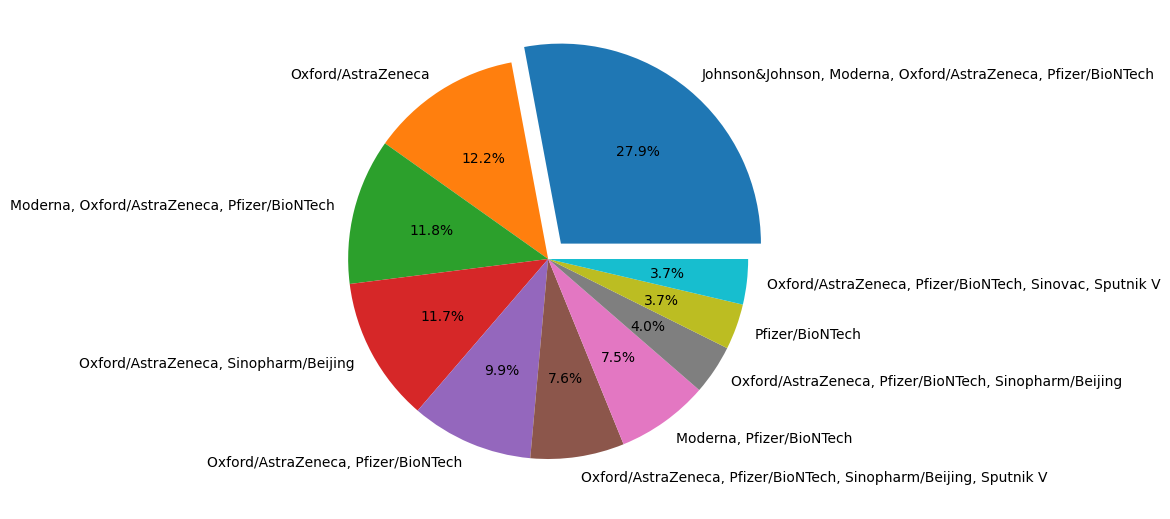

In [21]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

### Усовершенствование данных круговой диаграммы

1. Избавимся от пропусков в столбце с вакцинами. Сделаем это с помощью метода `dropna()`, который удаляет строки, содержащие пропуски в столбце, указанном в параметре `subset()`:

In [22]:
combination_not_nan = covid_df.dropna(subset='vaccines')

2. Полученные данные необходимо сгруппировать по странам (`country`) и определить последнюю зафиксированную комбинации вакцин в столбце `vaccines`:

In [23]:
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

В результате такого преобразования мы получаем *Series*, значениями которого являются комбинации вакцин, которые использовались в странах в последний день рассматриваемого периода.

In [24]:
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

3. Преобразуем данные с помощью метода `apply()`: применим к столбцу *lambda*-функцию, в которой будем удалять из строки с комбинациями вакцин пробелы и разделять комбинацию на отдельные составляющие по запятым.

In [25]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

# В результате в каждой строке столбца получим список с отдельными вакцинами, которые используются в стране:
combination_last

country
Afghanistan    [Johnson&Johnson, Oxford/AstraZeneca, Pfizer/B...
Albania        [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...
Algeria        [Oxford/AstraZeneca, Sinopharm/Beijing, SputnikV]
Andorra                    [Oxford/AstraZeneca, Pfizer/BioNTech]
Angola                                      [Oxford/AstraZeneca]
                                     ...                        
Venezuela         [Sinopharm/Beijing, Sinopharm/Wuhan, SputnikV]
Vietnam        [Moderna, Oxford/AstraZeneca, Pfizer/BioNTech,...
Yemen                                       [Oxford/AstraZeneca]
Zambia                   [Oxford/AstraZeneca, Sinopharm/Beijing]
Zimbabwe       [Oxford/AstraZeneca, Sinopharm/Beijing, Sinova...
Name: vaccines, Length: 174, dtype: object

4. Создадим словарь `vaccines_dict={}`, ключами которого будут являться уникальные вакцины, а значениями — количество стран, в которых они используются. Изначально словарь пустой.

In [26]:
vaccines_dict = {}

5. Заполнение словаря реализуем «в лоб» — используя циклы. Во внешнем цикле будем проходиться по всем элементам *Series* `combination_last`. На каждой итерации цикла в переменной цикла `vaccines_list` будет находиться список вакцин, которые используются в стране.  
Во внутреннем цикле будем проходиться по элементам этого списка, вакцинам. Переменную внутреннего цикла назовём `vaccine`.
В теле внутреннего цикла проверяем условие, что текущей вакцины ещё нет среди ключей словаря `vaccones_dict`. Если это условие выполняется, добавляем вакцину в словарь со значением 1. В противном случае увеличиваем текущее количество стран, в которых используется данная вакцина:

In [27]:
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

6. В результате работы получаем словарь, который преобразуем в объект *Series*. Далее выделим семь наиболее популярных вакцин, а остальные обозначим как `'other'`. Для этого сортируем Series по убыванию. Вычислим суммарное количество стран, в которых используются вакцины, не попавшие в наш ТОП-7, результат запишем в *Series* по индексу `'other'`.

Далее выделим восемь наибольших значений в полученной *Series* — для них и будем строить круговую диаграмму.

In [28]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

7. Строим кругвую диаграмму:

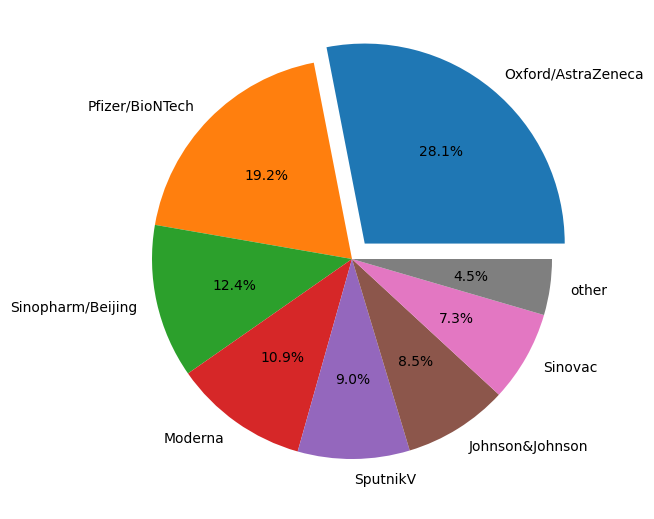

In [29]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct = '%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0]
);

### Добавление информативности в графики

Изобразим на одном графике, как росла общая заболеваемость (`confirmed`), число зафиксированных смертей (`deaths`), выздоровевших пациентов (`recovered`) и активных случаев (`active`) в Китае.

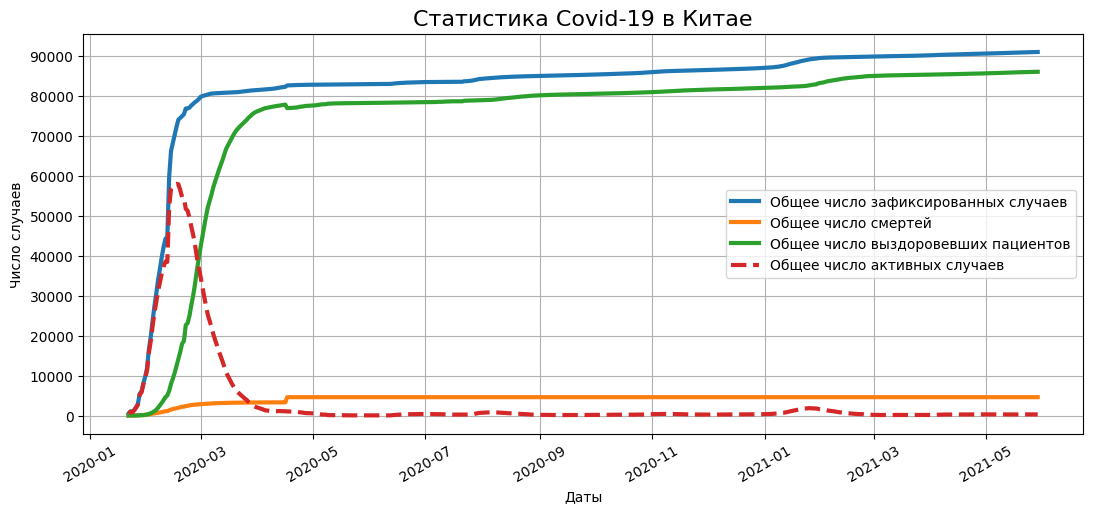

In [30]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

# визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

# установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

### Использование нескольких систем координат

Отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (`people_fully_vaccinated`), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (`people_fully_vaccinated_per_hundred`).

Для этого построим столбчатые диаграммы с помощью метода `bar()`.

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода `last()` и выбираем ТОП-5 стран с использованием метода `nlargest()`.

При отображении графиков создаём две координатные плоскости main_axes и `insert_axes`, на каждой из них отдельно строим столбчатые диаграммы.

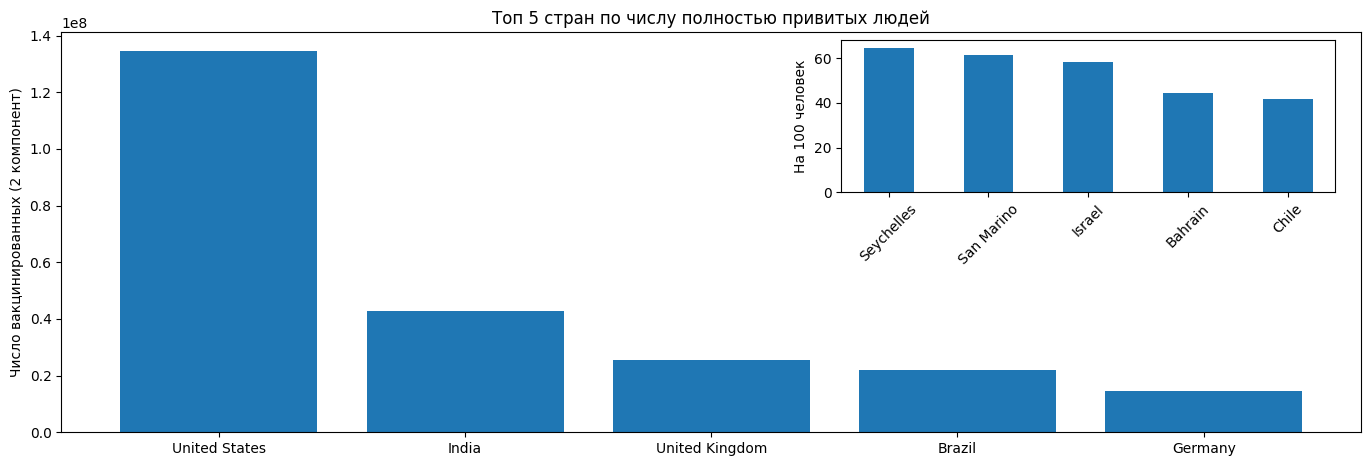

In [31]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

# визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

# визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45);

### <center> Subplots

Создание дополнительных систем координат с помощью метода `add_axes()` полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция `subplots()`. Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

Cледующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3:

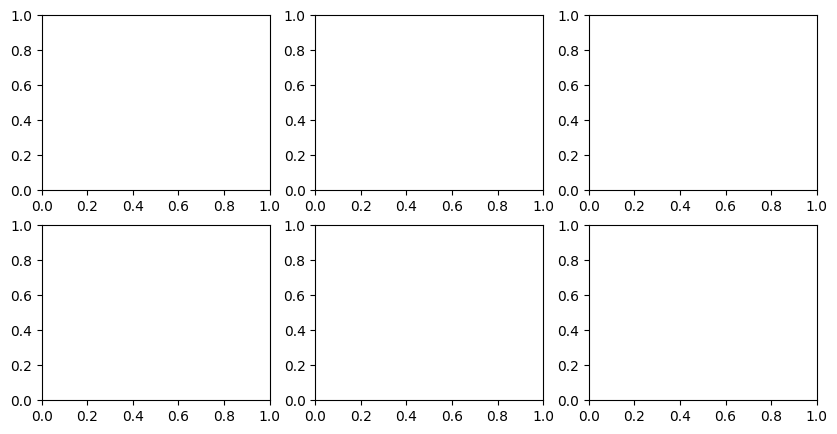

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

Теперь, обладая знаниями о методе `subplots()`, построим три графика:

1. Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
2. Линейный график изменения ежедневной заболеваемости в стране.
3. Гистограмму ежедневной заболеваемости в стране.

За построение гистограмм в библиотеке *Matplotlib* отвечает метод `hist()`.

Фильтруем таблицу `covid_df` по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку `axes` по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

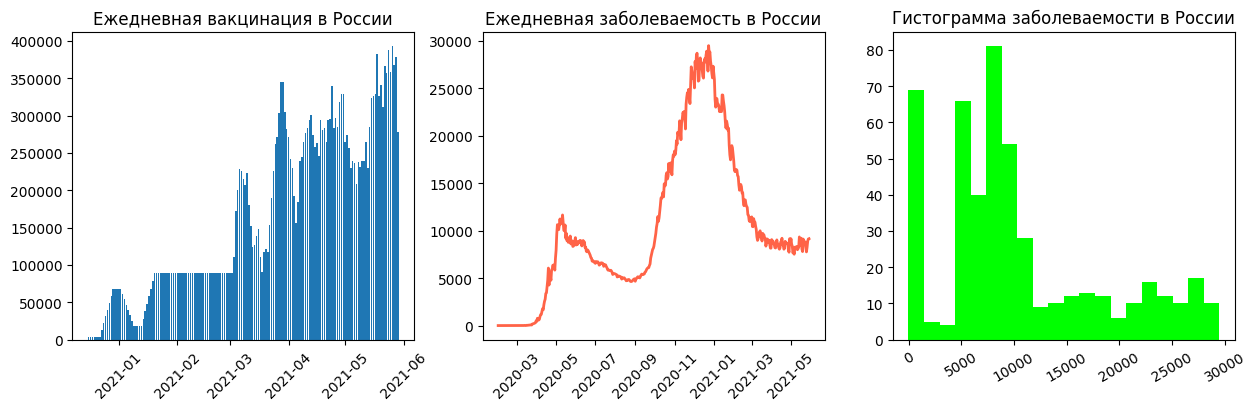

In [33]:
rassia_data = covid_df[mask_Russia]

# Визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=rassia_data['date'],
    height=rassia_data['daily_vaccinations'],
    label='Число вакцинированных'
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

# Линейный график
axes[1].plot(
    rassia_data['date'],
    rassia_data['daily_confirmed'],
    label='Число заболевших',
    color='tomato',
    lw=2
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

#  Гистограмма
axes[2].hist(
    x=rassia_data['daily_confirmed'],
    label='Число заболевших',
    color='lime',
    bins=20
)
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=30)

## <center> **Графические возможности библиотеки Seaborn**

Установка: `pip install seaborn`

In [34]:
import seaborn as sns
print(sns.__version__)

0.11.2


В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный *DataFrame* `croped_covid_df` для этих данных.

Для фильтрации по списку значений используем метод `isin()`, который проверяет, есть ли запись в столбце в переданном в метод списке. В результате возвращается привычная нам маска.

Немного магии *Feature Engineering*, чтобы показатели по странам стали сопоставимыми: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения (`daily_confirmed_per_hundred`).

In [35]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on='country')
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

Начнём с **гистограммы**. Для визуализации гистограмм в библиотеке *Seaborn* используется метод `histplot()`.

Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (`daily_confirmed`), а вторая — то же распределение в разрезе стран. 

Для этого создаём две координатные плоскости с помощью метода `subplots()`. 

На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 

На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

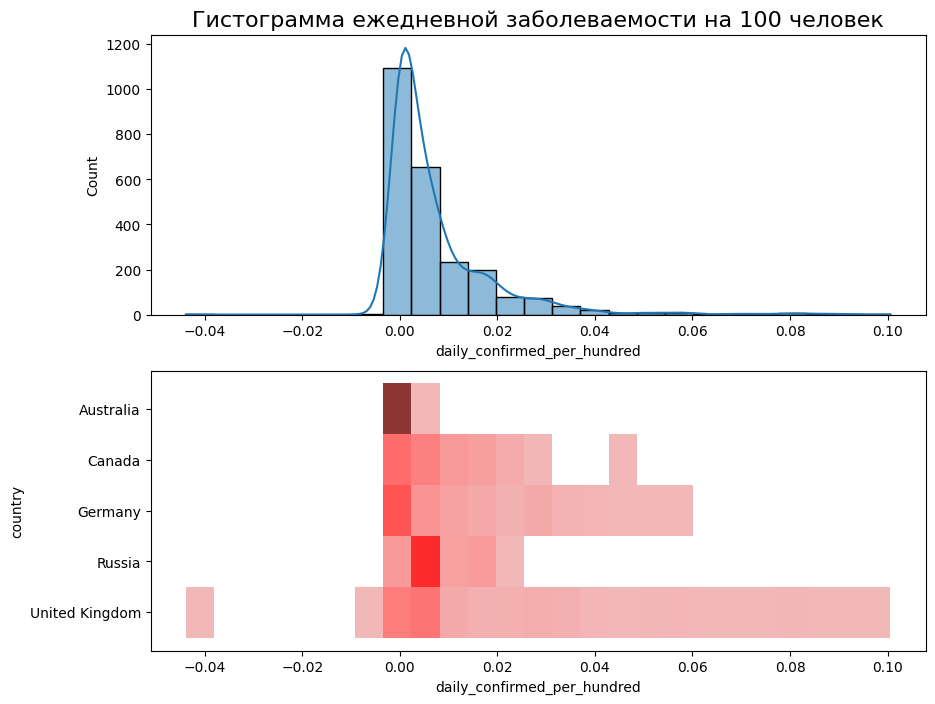

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

**Коробчатые диаграммы** в *Seaborn* строятся с помощью метода `boxplot()`.

Рассмотрим пример — построим коробчатые диаграммы признака летальности (`death_rate`).  
Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), параметр `orient` отвечает за ориентацию диаграммы, а `width` — за ширину коробок:

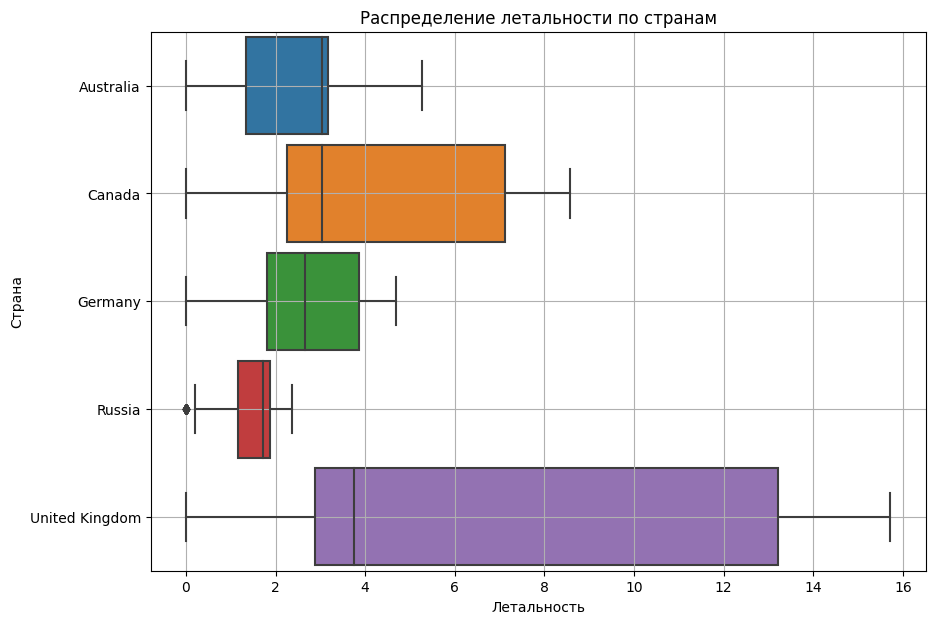

In [37]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Теперь рассмотрим пример **многоуровневой столбчатой диаграммы**. С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в *Seaborn* используется метод `barplot()`. По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре `estimator`). Для добавления многоуровневости используется параметр `hue`, который позволяет группировать данные по признаку:

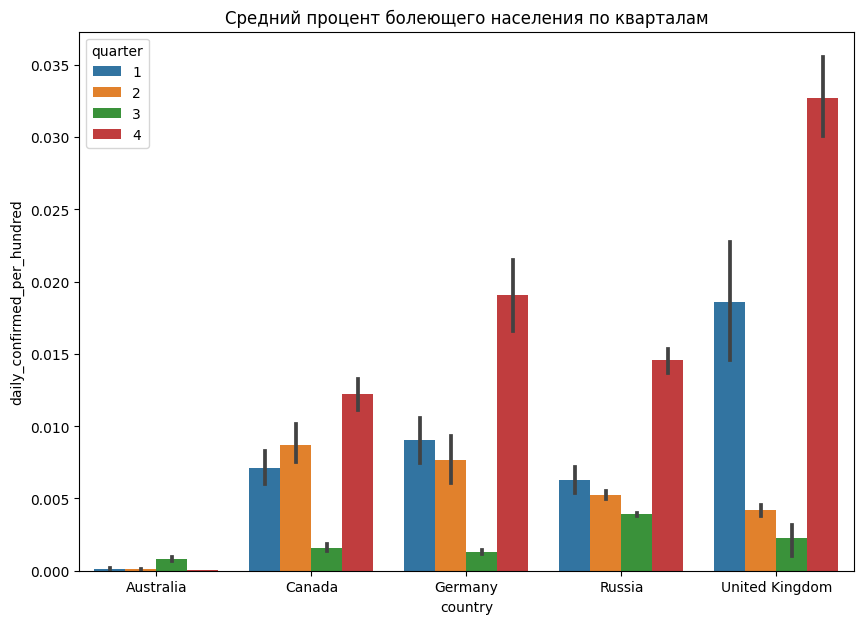

In [38]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Построим один из самых любимых дата-сайентистами графиков — `jointplot()` — в котором совмещены диаграмма рассеяния и гистограмма. Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

Построим `jointplot` зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (`daily_confirmed_per_hundred`) от числа полностью вакцинированных в процентах (`people_fully_vaccinated_per_hundred`).

Параметры `xlim` и `ylim` определяют диапазон отображения осей x и y. Параметр `height` отвечает за высоту и ширину графика (он квадратный).

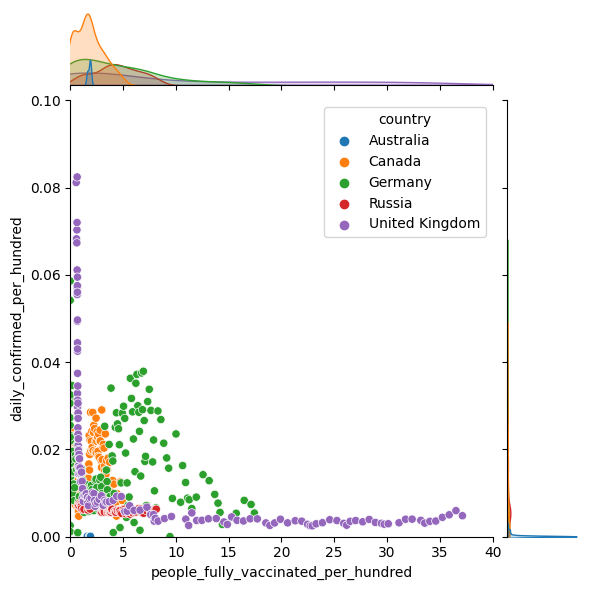

In [39]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1)
)

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Можно подумать о линейном графике. Но сделаем подругому. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас всего пять), нагляднее всего будет **тепловая карта**.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу `string`.

In [40]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date            2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                 NaN         0.0        0.00        0.01        0.02   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN        0.02         NaN         NaN   
United Kingdom        0.13         NaN         NaN         NaN         NaN   

date            2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                0.03        0.03        0.03        0.05        0.07   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN         NaN         NaN        0.04   
United Kingdom         NaN         NaN        0.99         NaN         NaN   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...         NaN         NaN         NaN         NaN   
Canada          ...       48.10       49.25       50.14       50.89   
Germany         ...       39.18       39.68       39.95       40.11   
Russia          ...       10.20       10.30       10.50       10.53   
United Kingdom  ...       55.01       55.33       55.63       55.82   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia            12.40       12.69       12.88       13.28       13.73   
Canada               51.77       52.39       53.05       53.95       54.99   
Germany              40.29       40.64       41.29       41.87       42.40   
Russia               10.70       10.81       11.07       11.12       11.19   
United Kingdom       55.99       56.27       56.61       56.99       57.29   

date            2021-05-29  
country                     
Australia            14.18  
Canada               55.71  
Germany              42.61  
Russia               11.29  
United Kingdom       57.56  

[5 rows x 168 columns]

Для построения тепловой карты в *Seaborn* используется метод `heatmap()`. Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.

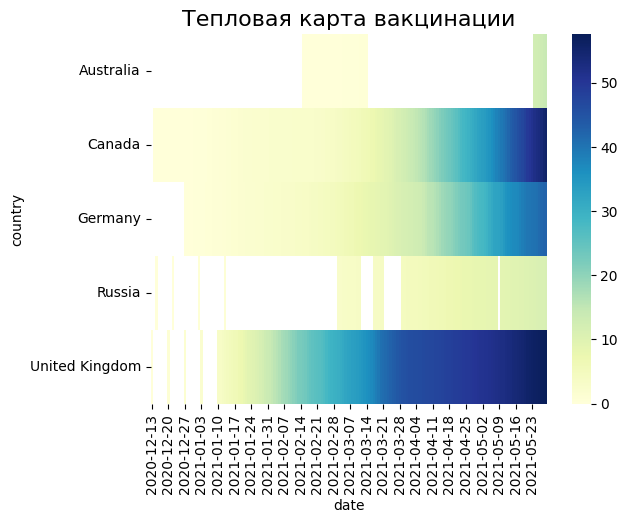

In [41]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

*Ещё пример:*

Создадим новый признак `confirmed_per_hundred`, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ($confirmed/population * 100$).  
Построим тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (`confirmed_per_hundred`) в странах из таблицы `croped_covid_df`.

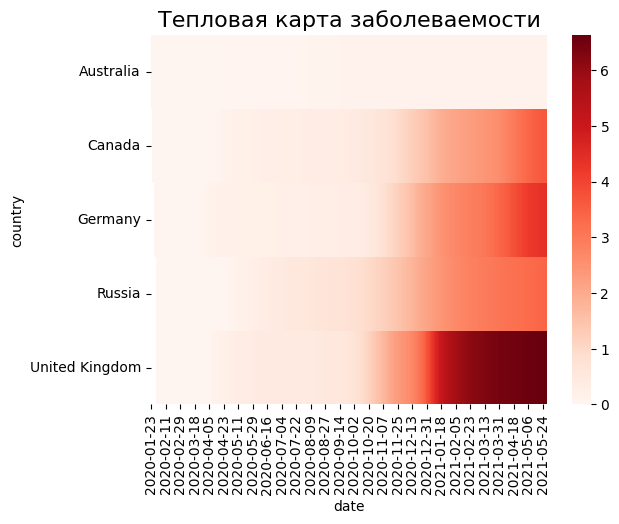

In [42]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100

pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')

heatmap = sns.heatmap(data=pivot, cmap='Reds')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16);

## <center> **7. Графические возможности библиотеки Plotly**

#### <center> ЭКСПРЕСС-РЕЖИМ

In [43]:
# установка:
# pip install plotly
# pip install --upgrade nbformat

In [44]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.9.0


Дальнейшая работа будет вестись с таблицей `covid_df` — полными данными о статистике распространения вируса Covid-19, а также о вакцинации в разных странах.

Рассмотрим процесс визуализации на примере. Посмотрим, как выглядит линейный график, построенный с помощью метода `line()` из модуля *express*. В документации к методу приведена пара десятков его параметров (они схожи с параметрами других методов)

Построим график роста зафиксированного числа случаев заражения (`confirmed`), смертей (`deaths`), выздоровлений (`recovered`) и активных случаев (`active`) за всё время. Для этого просуммируем статистику по дням и передадим полученный *DataFrame* в метод `line()`.

Для отображения созданной методом `line()` фигуры используется метод `fig.show()`:

In [45]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data,
    x='date',
    y=['confirmed', 'recovered', 'deaths', 'active'],
    height=500,
    width=1000,
    title='Confirmed, Recovered, Deaths, Active cases over Time'
)

fig.show()

![](./plotly/line_data)

Давайте рассмотрим ещё один пример — построим столбчатую диаграмму, показывающую ТОП-10 стран по среднему проценту выздоравливающих пациентов (`recover_rate`). Для этого используем метод `bar()` модуля *express*. Добавим несколько параметров:

* `color` — группирующий признак, в соответствии с которым будут раскрашены столбцы диаграммы;  
* `text` — текст, который будет подписан на столбцах диаграммы;  
* `orientation` — ориентация графика (`'v'` — вертикальная, `'h'` — горизонтальная).

In [46]:
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="country", #ось x
    y="recover_rate", #ось y
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate' #заголовок
)

fig.show()

![](./plotly/bar_data)

А теперь построим что-нибудь, специфичное для библиотеки *Plotly*. Например, график `treemap()` (древесная, или иерархическая, диаграмма). Такой график используется для исследования показателя, когда число возможных категорий велико (например, число стран в таблице `covid_df`).

При построении этого графика выделенное пространство разбивается на прямоугольники, соответствующие величине показателя для каждой из категорий: чем меньше прямоугольник, тем меньше в нём значение показателя.

Построим иерархическую диаграмму для среднего ежедневного показателя выздоровевших пациентов (`daily_recovered`) во всех странах.

In [47]:
#считаем среднее ежедневно фиксируемое количество выздоровевших по странам
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #DataFrame
    path=['country'], #категориальный признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, #высота
    width=1000, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

fig.show()

![](./plotly/treemap_data)

#### АНИМАЦИЯ ГРАФИКОВ ВО ВРЕМЕНИ

С помощью *plotly.express* можно строить даже анимированные графики. Мы рассмотрим только базовые приёмы анимации, но на самом деле это очень интересная и глубокая тема.

Для нашей задачи отлично подойдёт график под названием `choropleth()` (тепловая картограмма) — это тепловая карта, которая строится на географической карте мира. Чтобы увидеть, как изменяется значение показателя на карте во времени, можно добавить в график анимацию.

Итак, построим фоновую картограмму, которая покажет распространение (`confirmed`) коронавируса в мире во времени.

Предварительно для правильного отображения на анимационном бегунке даты в таблице `covid_df` необходимо перевести обратно в строковый тип данных.

In [48]:
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

![](./plotly/choropleth_data)

#### ТРЁХМЕРНАЯ ВИЗУАЛИЗАЦИЯ

На самом деле общий принцип построения 3D-графиков ничем не отличается от построения обычных. Просто добавляется ещё один параметр — ось z (ось аппликат).

Построим 3D-диаграмму рассеяния, которая покажет, как число ежедневно обнаруживаемых случаев и число ежедневных смертей влияют на желание людей вакцинироваться. Для того чтобы нам было проще рассматривать диаграмму (точки будут более сгруппированными), построим её в логарифмическом масштабе по осям абсцисс и ординат.

Для построения такой диаграммы используем метод `scatter_3d()`. Добавим несколько параметров:

* `z` — параметр по оси аппликат;
* `log_x` — установка логарифмического масштаба по оси *x*;
* `log_y` — установка логарифмического масштаба по оси *y*.

Чтобы не перегрузить график, будем строить зависимость только в нескольких странах: США, России, Великобритании, Бразилии и Франции. Наблюдения для каждой страны окрасим разными цветами.

In [59]:
#фильтруем таблицу по странам
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, #DataFrame
    x = 'daily_confirmed', #ось абсцисс
    y = 'daily_deaths', #ось ординат
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

#отображаем график
fig.show()
fig.write_html("plotly/scatter_3d.html")

СОХРАНЕНИЕ ГРАФИКА PLOTLY

Чтобы сохранить интерактивный график, построенный в библиотеке *Plotly*, чаще всего используется метод фигуры `fig.write_html('path/to/file.html')`, который сохраняет график в формате `HTML`, после чего его можно вставлять на сайт, в веб-приложение или просто делиться им с коллегами. 

Сохраним график трёхмерной диаграммы рассеяния:

In [50]:
fig.write_html("plotly/scatter_3d.html")

#### *Ещё примеры:*

Линейный график, который отображает, как изменялось ежедневное количество вакцинированных (`daily_vaccinations`) в мире во времени.

In [51]:
line_data = covid_df.groupby('date', as_index=False)['daily_vaccinations'].sum()
fig = px.line(
    data_frame=line_data,
    x='date',
    y='daily_vaccinations',
    height=500,
    width=1000,
    title='Кол-во вакцинированных во времени'
)

fig.show()

![](./plotly/line_data2)

Анимированная тепловая картограмма для числа поставленных вакцин во всём мире (`total_vaccinations`).

In [52]:
fig = px.choropleth(
    data_frame=choropleth_data,
    locations='country',
    locationmode='country names',
    color='total_vaccinations',
    animation_frame="date",
    range_color=[0, 30e6],
    title='Global Spread of COVID-19',
    width=800,
    height=500,
    color_continuous_scale='Greens'
)

fig.show()

![](./plotly/choropleth2)